<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/PredictStockpriceAnalysis_with_autoARIMA_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plotly.express as px

In [3]:
df = pd.read_csv('BAJFINANCE.csv')

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/3/2000,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,1/4/2000,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,1/5/2000,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,1/6/2000,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,1/7/2000,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [5]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64



For time series data, we need to check if the data is stationary, in which the mean, variance and autocorrelation structure do not change over time;the statistical properties of a system do not change over time and overall behavior of the data should remain constant.



In [10]:
plt.figure(figsize= (12,10), dpi=150)
px.line( df, x=df.index , y=df['VWAP'])



<Figure size 1800x1500 with 0 Axes>

In [11]:
df.shape

(5070, 14)

In [12]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [15]:
df.shape

(2291, 14)

In [16]:
df1=df.copy()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2291 entries, 2011-06-01 to 2020-08-31
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              2291 non-null   object 
 1   Series              2291 non-null   object 
 2   Prev Close          2291 non-null   float64
 3   Open                2291 non-null   float64
 4   High                2291 non-null   float64
 5   Low                 2291 non-null   float64
 6   Last                2291 non-null   float64
 7   Close               2291 non-null   float64
 8   VWAP                2291 non-null   float64
 9   Volume              2291 non-null   int64  
 10  Turnover            2291 non-null   float64
 11  Trades              2291 non-null   float64
 12  Deliverable Volume  2291 non-null   float64
 13  %Deliverble         2291 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 268.5+ KB


In [18]:
df1.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [19]:
df1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [20]:
lag_features = ['High','Low','Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [21]:
for feature in lag_features:
  df1[feature + 'rolling_mean_3'] = df1[feature].rolling(window=window1).mean()
  df1[feature + 'rolling_mean_7'] = df1[feature].rolling(window=window2).mean()

In [22]:
for feature in lag_features:
  df1[feature + 'rolling_std_3'] = df1[feature].rolling(window=window1).std()
  df1[feature + 'rolling_std_7'] = df1[feature].rolling(window=window2).std()

In [23]:
df1.head(n=10)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Lowrolling_mean_3,Lowrolling_mean_7,Volumerolling_mean_3,Volumerolling_mean_7,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Tradesrolling_mean_3,Tradesrolling_mean_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322620e+11,1416.0,3427.0,0.4971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761210e+11,432.0,1718.0,0.6204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214630e+12,135.0,50912.0,0.9900,637.733333,NaN,618.666667,NaN,20363.333333,NaN,1.274338e+12,NaN,661.000000,NaN,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685216e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918,639.233333,NaN,617.116667,NaN,19880.666667,NaN,1.242081e+12,NaN,278.333333,NaN,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710135e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799,634.250000,NaN,611.783333,NaN,20954.666667,NaN,1.306735e+12,NaN,225.333333,NaN,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652376e+12,NaN,78.270897,NaN
2011-06-08,BAJFINANCE,EQ,619.15,604.00,645.00,604.00,633.25,635.60,634.65,26863,1.704860e+12,881.0,15202.0,0.5659,636.650000,NaN,606.450000,NaN,12766.666667,NaN,8.034783e+11,NaN,474.000000,NaN,11.178886,NaN,4.243524,NaN,12210.823737,NaN,7.808110e+11,NaN,352.481205,NaN
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,1.994720e+12,894.0,18626.0,0.5960,638.650000,638.592857,612.666667,615.050000,21368.666667,18663.142857,1.356555e+12,1.175453e+12,682.666667,614.142857,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665149e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,1.958590e+12,1360.0,12656.0,0.4098,646.750000,640.271429,617.516667,615.414286,29666.666667,22090.428571,1.886057e+12,1.393499e+12,1045.000000,606.142857,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579573e+11,1.136004e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,2.479860e+11,250.0,1745.0,0.4383,641.033333,638.692857,621.516667,614.842857,22039.333333,22263.571429,1.400432e+12,1.403766e+12,834.666667,580.142857,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982110e+11,1.123423e+12,557.373603,464.778596


In [24]:
df1.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [25]:
df1.shape

(2291, 34)

In [26]:
df1.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [27]:
df1.dropna(inplace=True)

In [28]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [29]:

training_data = df1[0:1800]
test_data = df1[1800:]



In [30]:
training_data.shape

(1800, 34)

In [31]:
test_data.shape

(485, 34)

In [32]:
!pip install pmdarima

In [33]:
from pmdarima import auto_arima

In [35]:
model = auto_arima(y=training_data['VWAP'],exogenous= training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.525, Time=6.99 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.215, Time=3.60 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.338, Time=3.77 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.310, Time=5.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.914, Time=3.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.225, Time=5.61 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 28.924 seconds


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning:

divide by zero encountered in reciprocal



In [37]:
model.fit(training_data['VWAP'],training_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [38]:
predictions = model.predict(n_periods=len(test_data),exogenous= test_data[ind_features])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [39]:
test_data['prediction_ARIMA'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



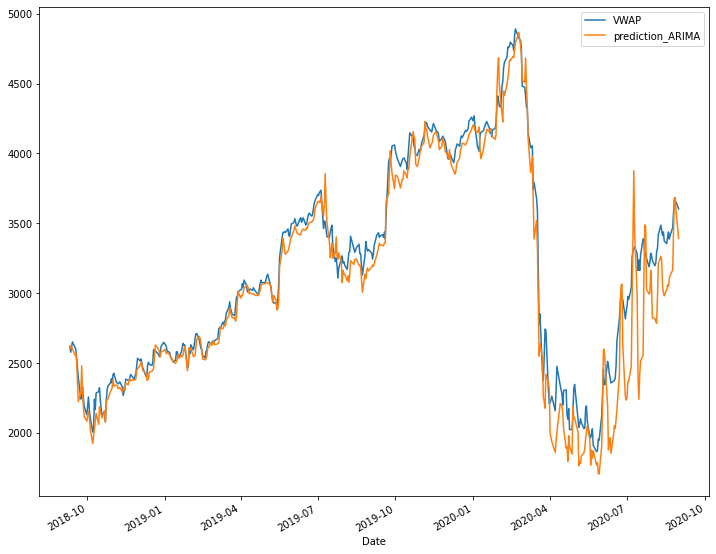

In [41]:
test_data[['VWAP','prediction_ARIMA']].plot(figsize=(12,10))

Check the performance of the model

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
np.sqrt(mean_squared_error(test_data['prediction_ARIMA'],test_data['VWAP']))

187.57323032857119

In [46]:
mean_absolute_error(test_data['prediction_ARIMA'],test_data['VWAP'])

124.51779999774988